<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/contractive_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contractive Autoencoder

Contractive autoencoders incorporate a regularization term during training that penalizes changes in the hidden layer activations concerning the input data. This regularization encourages the autoencoder to learn robust and stable features by limiting the sensitivity of the hidden layer to small changes in the input. The contractive autoencoder is particularly useful for capturing essential patterns and reducing the impact of irrelevant variations in the input data. This makes it suitable for applications where extracting meaningful and stable representations is crucial, such as in denoising or dimensionality reduction tasks.

In [1]:
# Install the library

!pip install rapidae

In [3]:
from keras import utils
from rapidae.data import load_MNIST
from rapidae.models import CAE
from rapidae.models.base import VanillaEncoder, VanillaDecoder
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_reconstructions

### Data

In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are flattened since the first layer of the encoder we are going to use is a Dense layer.

In [4]:
# Load dataset
data = load_MNIST()

# Flatten and normalize data
x_train = data["x_train"].reshape(data["x_train"].shape[0], -1) / 255
x_test = data["x_test"].reshape(data["x_test"].shape[0], -1) / 255

# Obtain number of clasess
n_classes = len(set(data["y_train"]))

2024-04-16 08:55:55 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-16 08:55:55 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-16 08:55:55 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-16 08:55:55 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-04-16 08:55:55 [INFO]: Deleting MNIST data...


### Model

In this step the model is created. Here we can define some parameters of the network as the dimensionality of the latent space, the type of encoder/decoder and the number of layers and neurons.
The model used in this example is a Contractive Autoencoder with vanilla MLP encoder and decoder.

In [5]:
# Model creation
model = CAE(input_dim=x_train.shape[1], 
            latent_dim=10)

2024-04-16 08:56:33 [INFO]: Trying to set encoder and decoder from child class...
2024-04-16 08:56:33 [WARNING]: No encoder found in cae, using default encoder with layers_conf=[512]...
2024-04-16 08:56:33 [WARNING]: No decoder found in cae, using default decoder with layers_conf=[512]...


### Training

In [7]:
pipe = TrainingPipeline(name='contractive_ae_MNIST',
                        model=model, 
                        num_epochs=20)

trained_model = pipe(x=x_train)

2024-04-16 08:57:18 [INFO]: +++ contractive_ae_MNIST +++
2024-04-16 08:57:18 [INFO]: Creating folder in ./output_dir/contractive_ae_MNIST_2024-04-16_08-57
2024-04-16 08:57:18 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/20


2024-04-16 08:57:19.169555: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.



Epoch 1: loss improved from inf to 0.03061, saving model to ./output_dir/contractive_ae_MNIST_2024-04-16_08-57/model.weights.h5
469/469 - 5s - 11ms/step - contractive_loss: 4.5774e-04 - loss: 0.0306 - reconstruction_loss: 0.0302
Epoch 2/20

Epoch 2: loss improved from 0.03061 to 0.02632, saving model to ./output_dir/contractive_ae_MNIST_2024-04-16_08-57/model.weights.h5
469/469 - 6s - 12ms/step - contractive_loss: 3.2631e-04 - loss: 0.0263 - reconstruction_loss: 0.0260
Epoch 3/20

Epoch 3: loss improved from 0.02632 to 0.02368, saving model to ./output_dir/contractive_ae_MNIST_2024-04-16_08-57/model.weights.h5
469/469 - 5s - 11ms/step - contractive_loss: 2.9626e-04 - loss: 0.0237 - reconstruction_loss: 0.0234
Epoch 4/20

Epoch 4: loss improved from 0.02368 to 0.02189, saving model to ./output_dir/contractive_ae_MNIST_2024-04-16_08-57/model.weights.h5
469/469 - 5s - 11ms/step - contractive_loss: 2.7379e-04 - loss: 0.0219 - reconstruction_loss: 0.0216
Epoch 5/20

Epoch 5: loss improved 

2024-04-16 08:59:07 [INFO]: Restoring best model
2024-04-16 08:59:07 [INFO]: Best model restored


### Evaluation

Once the model is trained, we can call it on the test set and compare the reconstructed images to check its performance.

  1/313 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


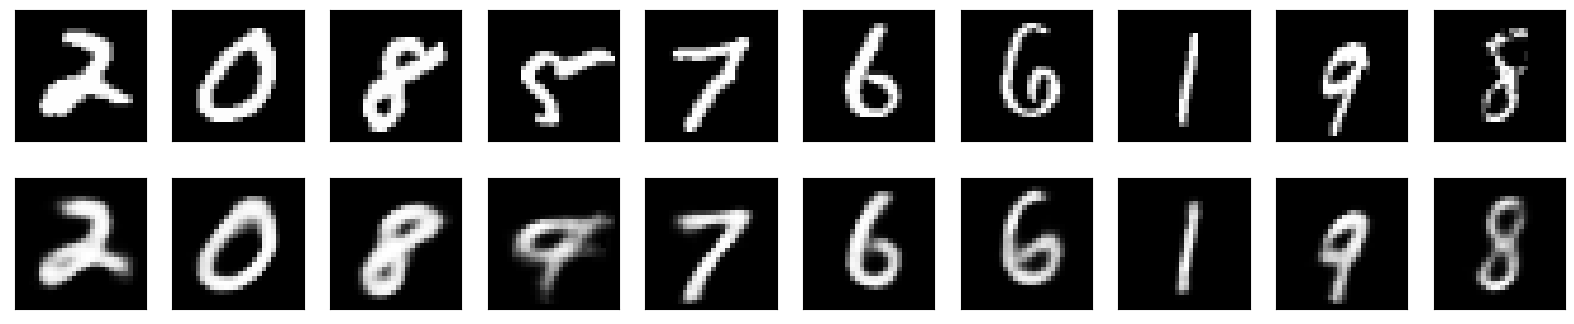

In [9]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['x_recon'])